# IIQ3402: PreAyudantía 2

En esta ayudantía veremos los conceptos básicos del **Análisis Exploratorio de Datos.**


Para abrirlo en Google colab:
<a target="_blank" href="https://colab.research.google.com/github/SysBioengLab/IIQ3402-Statistical-Design/blob/main/Ayudantias/preAyudantia2_AnalisisExploratorioDeDatos.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
!pip install pandas -q
!pip install numpy -q
!pip install matplotlib -q
!pip install statsmodels -q
!pip install seaborn -q

# Funciones a Utilizar

Para facilitar la transmición de información y utilización de `python` en sus proyectos futuros y el curso. Cabe mencionar que otros métodos se utilizarán, por lo cual es importante que vean los materiales complementarios.

In [5]:
# Lectura de Datos del curso
import pandas as pd
from scipy.stats import probplot
import numpy as np
import matplotlib.pyplot as plt
def read_course_dataset(name):
    """
    Esta función se encargará de entregarles el set de datos desde el GitHub del curso
    ---
    Parameters
    name: str
        Nombre del set de datos a leer.
    ---
    Notes
    Datasets disponibles:
        - netflix_titles.csv
        - Video_Game_Sales_as_of_Jan_2017.csv
        - oscars_df.csv
    """
    link = 'https://github.com/SysBioengLab/IIQ3402-Statistical-Design/blob/main/SetDeDatos/'
    link += name + '?raw=true'
    return pd.read_csv(link)

def group_and_describe(df, columna, dato_interes):
    """
    Esta función permite agrupar ciertos datos de interes (dato_interes) por una columna del DataFrame (columna) y obtener un resumen de las estadisticas descriptivas
    - Media
    - Desviacion estandar
    - Minimo
    - 25%
    - 50%
    - 75%
    - Maximo
    - IQR
    - Rango
    - (Mean - Median)
    ---
    df: pd.DataFrame
        DataFrame a agrupar
    columna: str
        Nombre de la columna por la cual se quiere agrupar
    dato_interes: str
        Nombre de la columna de la cual se quiere obtener el resumen
    ---
    return: pd.DataFrame
        DataFrame con el resumen de las estadisticas descriptivas
    ---
    comentario:
    Puede haber errores si los datos no son numericos
    """

    agrupado = df.groupby(columna)[dato_interes].describe()

    agrupado['IQR'] = agrupado['75%'] - agrupado['25%']
    agrupado['Rango'] = agrupado['max'] - agrupado['min']
    agrupado['Mean - Median'] = np.round(agrupado['mean'] - agrupado['50%'], 5)
    return agrupado

def histogram_described(data, mean = True, median = True, mode = True, ejex = None, ejey = None, titulo = None):
    """
    Función que permite obtener un histograma de los datos y mostrar medidas de tendencia central
    ---
    Parameters

    data: pd.Series or np.array
        Serie de datos
    mean: bool
        Indica si se quiere mostrar la media
    median: bool
        Indica si se quiere mostrar la mediana
    mode: bool
        Indica si se quiere mostrar la moda
    ---
    return: None

    """
    # generamos la figura
    fig, ax = plt.subplots(figsize = (6,5), dpi = 300)
    # generamos el histograma
    n_bins = np.sqrt(len(data)).astype(int)
    ax.hist(data, bins=n_bins, alpha=0.7, color='skyblue', density=True)
    # media
    if type(data) != pd.Series:
        data = pd.Series(data)
    if mean:
        ax.axvline(data.mean(), color='r', linestyle='dashed', linewidth=1, label = 'Media')
    # mediana
    if median:
        ax.axvline(data.median(), color='g', linestyle='dashed', linewidth=1, label = 'Mediana')
    # moda
    if mode:
        ax.axvline(data.mode()[0], color='b', linestyle='dashed', linewidth=1, label = 'Moda')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    # ejes
    if ejex:
        ax.set_xlabel(ejex)
    if ejey:
        ax.set_ylabel(ejey)
    # titulo
    if titulo:
        ax.set_title(titulo)
    plt.show()

def histogram_qqplot(data, mean = True, median = True, mode = True,
                    ejex_histogram = None, ejey_histogram = None,
                    ejex_qqplot = None, ejey_qqplot = None, titulo_histograma = None, titulo_qqplot = None,
                    titulo_general = None):
    """
    Función que permite obtener un histograma y un qqplot de los datos
    ---
    Parameters

    data: pd.Series or np.array
        Serie de datos
    mean: bool
        Indica si se quiere mostrar la media
    median: bool
        Indica si se quiere mostrar la mediana
    mode: bool
        Indica si se quiere mostrar la moda
    ejex_histogram: str
        Nombre del eje x del histograma
    ejey_histogram: str
        Nombre del eje y del histograma
    ejex_qqplot: str
        Nombre del eje x del qqplot
    ejey_qqplot: str
        Nombre del eje y del qqplot
    titulo: str
        Nombre del titulo
    ---
    return: None
    """
    # generamos la figura
    fig, ax = plt.subplots(1, 2, figsize = (10,5), dpi = 300)
    # histograma

    n_bins = np.sqrt(len(data)).astype(int)
    ax[0].hist(data, bins=n_bins, alpha=0.7, color='skyblue', density=True)
    # media
    if type(data) != pd.Series:
        data = pd.Series(data)
    if mean:
        ax[0].axvline(data.mean(), color='r', linestyle='dashed', linewidth=1, label = 'Media')
    # mediana
    if median:
        ax[0].axvline(data.median(), color='g', linestyle='dashed', linewidth=1, label = 'Mediana')
    # moda
    if mode:
        ax[0].axvline(data.mode()[0], color='b', linestyle='dashed', linewidth=1, label = 'Moda')
    ax[0].legend()
    # ejes
    if ejex_histogram:
        ax[0].set_xlabel(ejex_histogram)
    if ejey_histogram:
        ax[0].set_ylabel(ejey_histogram)
    # titulo
    if titulo_histograma:
        ax[0].set_title(titulo_histograma)

    ### qqplot ###

    (osm, osr), (slope, intercept, r) = probplot(data, dist="norm")

    ax[1].plot(osm, osr, 'o')
    ax[1].plot(osm, slope*osm + intercept, color = 'r', linestyle = '--', label = 'Linea de regresion')
    if ejex_qqplot:
        ax[1].set_xlabel(ejex_qqplot)
    else:
        ax[1].set_xlabel('Cuantiles teoricos')
    if ejey_qqplot:
        ax[1].set_ylabel(ejey_qqplot)
    else:
        ax[1].set_ylabel('Cuantiles observados')
    ax[1].legend()
    if titulo_qqplot:
        ax[1].set_title(titulo_qqplot)
    if titulo_general:
        fig.suptitle(titulo_general)
    fig.tight_layout()

    plt.show()
def histogram_boxplot(data, mean = True, median = True, mode = True,
                    ejex_histogram = None, ejey_histogram = None,
                    ejex_boxplot = None, ejey_boxplot = None, titulo_histograma = None, titulo_boxplot = None,
                    titulo_general = None):
    """
    Función que permite obtener un histograma y un boxplot de los datos
    ---
    Parameters
    data : pd.Series or np.array
        Serie de datos
    mean : bool
        Indica si se quiere mostrar la media
    median : bool
        Indica si se quiere mostrar la mediana
    mode : bool
        Indica si se quiere mostrar la moda
    ejex_histogram : str
        Nombre del eje x del histograma
    ejey_histogram : str
        Nombre del eje y del histograma
    ejex_boxplot : str
        Nombre del eje x del boxplot
    ejey_boxplot : str
        Nombre del eje y del boxplot
    titulo_histograma : str
        Nombre del titulo del histograma
    titulo_boxplot : str
        Nombre del titulo del boxplot
    titulo_general : str
        Nombre del titulo general
    ---
    return: None
    """

        # generamos la figura
    fig, ax = plt.subplots(1, 2, figsize = (10,5), dpi = 300)
    # histograma

    n_bins = np.sqrt(len(data)).astype(int)
    ax[0].hist(data, bins=n_bins, alpha=0.7, color='skyblue', density=True)
    # media
    if type(data) != pd.Series:
        data = pd.Series(data)
    if mean:
        ax[0].axvline(data.mean(), color='r', linestyle='dashed', linewidth=1, label = 'Media')
    # mediana
    if median:
        ax[0].axvline(data.median(), color='g', linestyle='dashed', linewidth=1, label = 'Mediana')
    # moda
    if mode:
        ax[0].axvline(data.mode()[0], color='b', linestyle='dashed', linewidth=1, label = 'Moda')
    ax[0].legend()
    # ejes
    if ejex_histogram:
        ax[0].set_xlabel(ejex_histogram)
    if ejey_histogram:
        ax[0].set_ylabel(ejey_histogram)
    # titulo
    if titulo_histograma:
        ax[0].set_title(titulo_histograma)

    ### boxplot ###
    ax[1].boxplot(data)
    if ejex_boxplot:
        ax[1].set_xlabel(ejex_boxplot)
    if ejey_boxplot:
        ax[1].set_ylabel(ejey_boxplot)
    if titulo_boxplot:
        ax[1].set_title(titulo_boxplot)
    if titulo_general:
        fig.suptitle(titulo_general)
    fig.tight_layout()
    plt.show()



# Ejemplos Prácticos

In [3]:
### read_course_dataset

netflix = read_course_dataset('netflix_titles.csv')

### group_and_describe

group_and_describe(netflix, 'type', 'release_year')

,count,mean,std,min,25%,50%,75%,max,IQR,Rango,Mean - Median
type,,,,,,,,,,,
Movie,4265.0,2012.354279,9.735306,1942.0,2012.0,2016.0,2017.0,2020.0,5.0,78.0,-3.64572
TV Show,1969.0,2015.536313,5.799568,1925.0,2015.0,2017.0,2018.0,2020.0,3.0,95.0,-1.46369


In [9]:
# Generamos dos datos aleatorios para mostrar las funciones
# No es necesario que entiendan las siguientes dos lineas
data = np.random.normal(0, 1, 1000)
data2 = np.random.lognormal(0, .4, 1000)

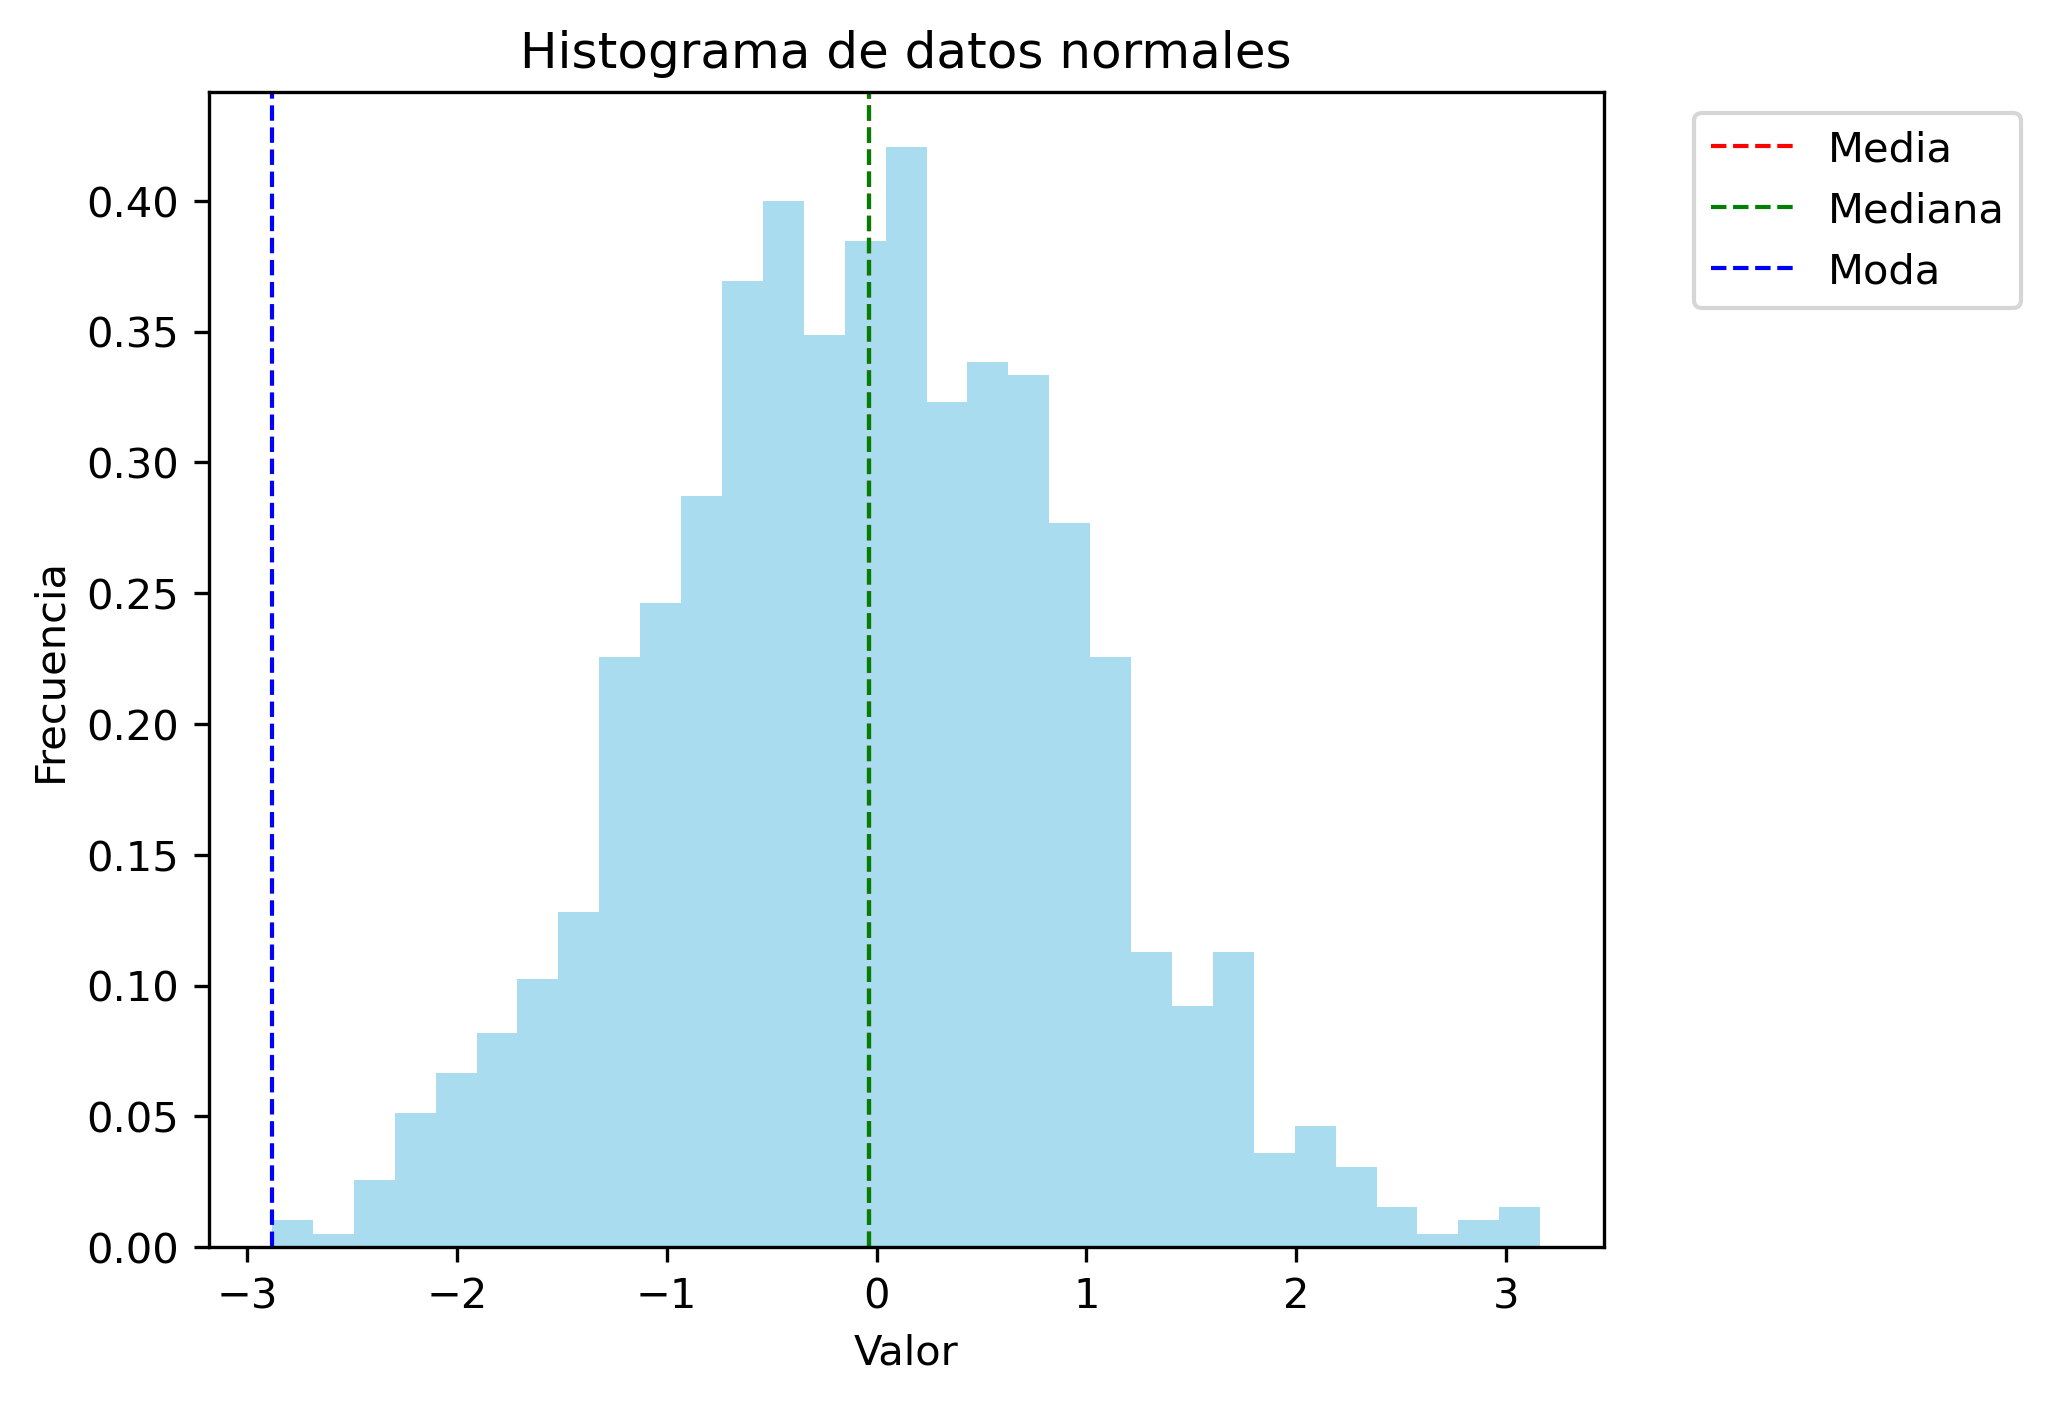

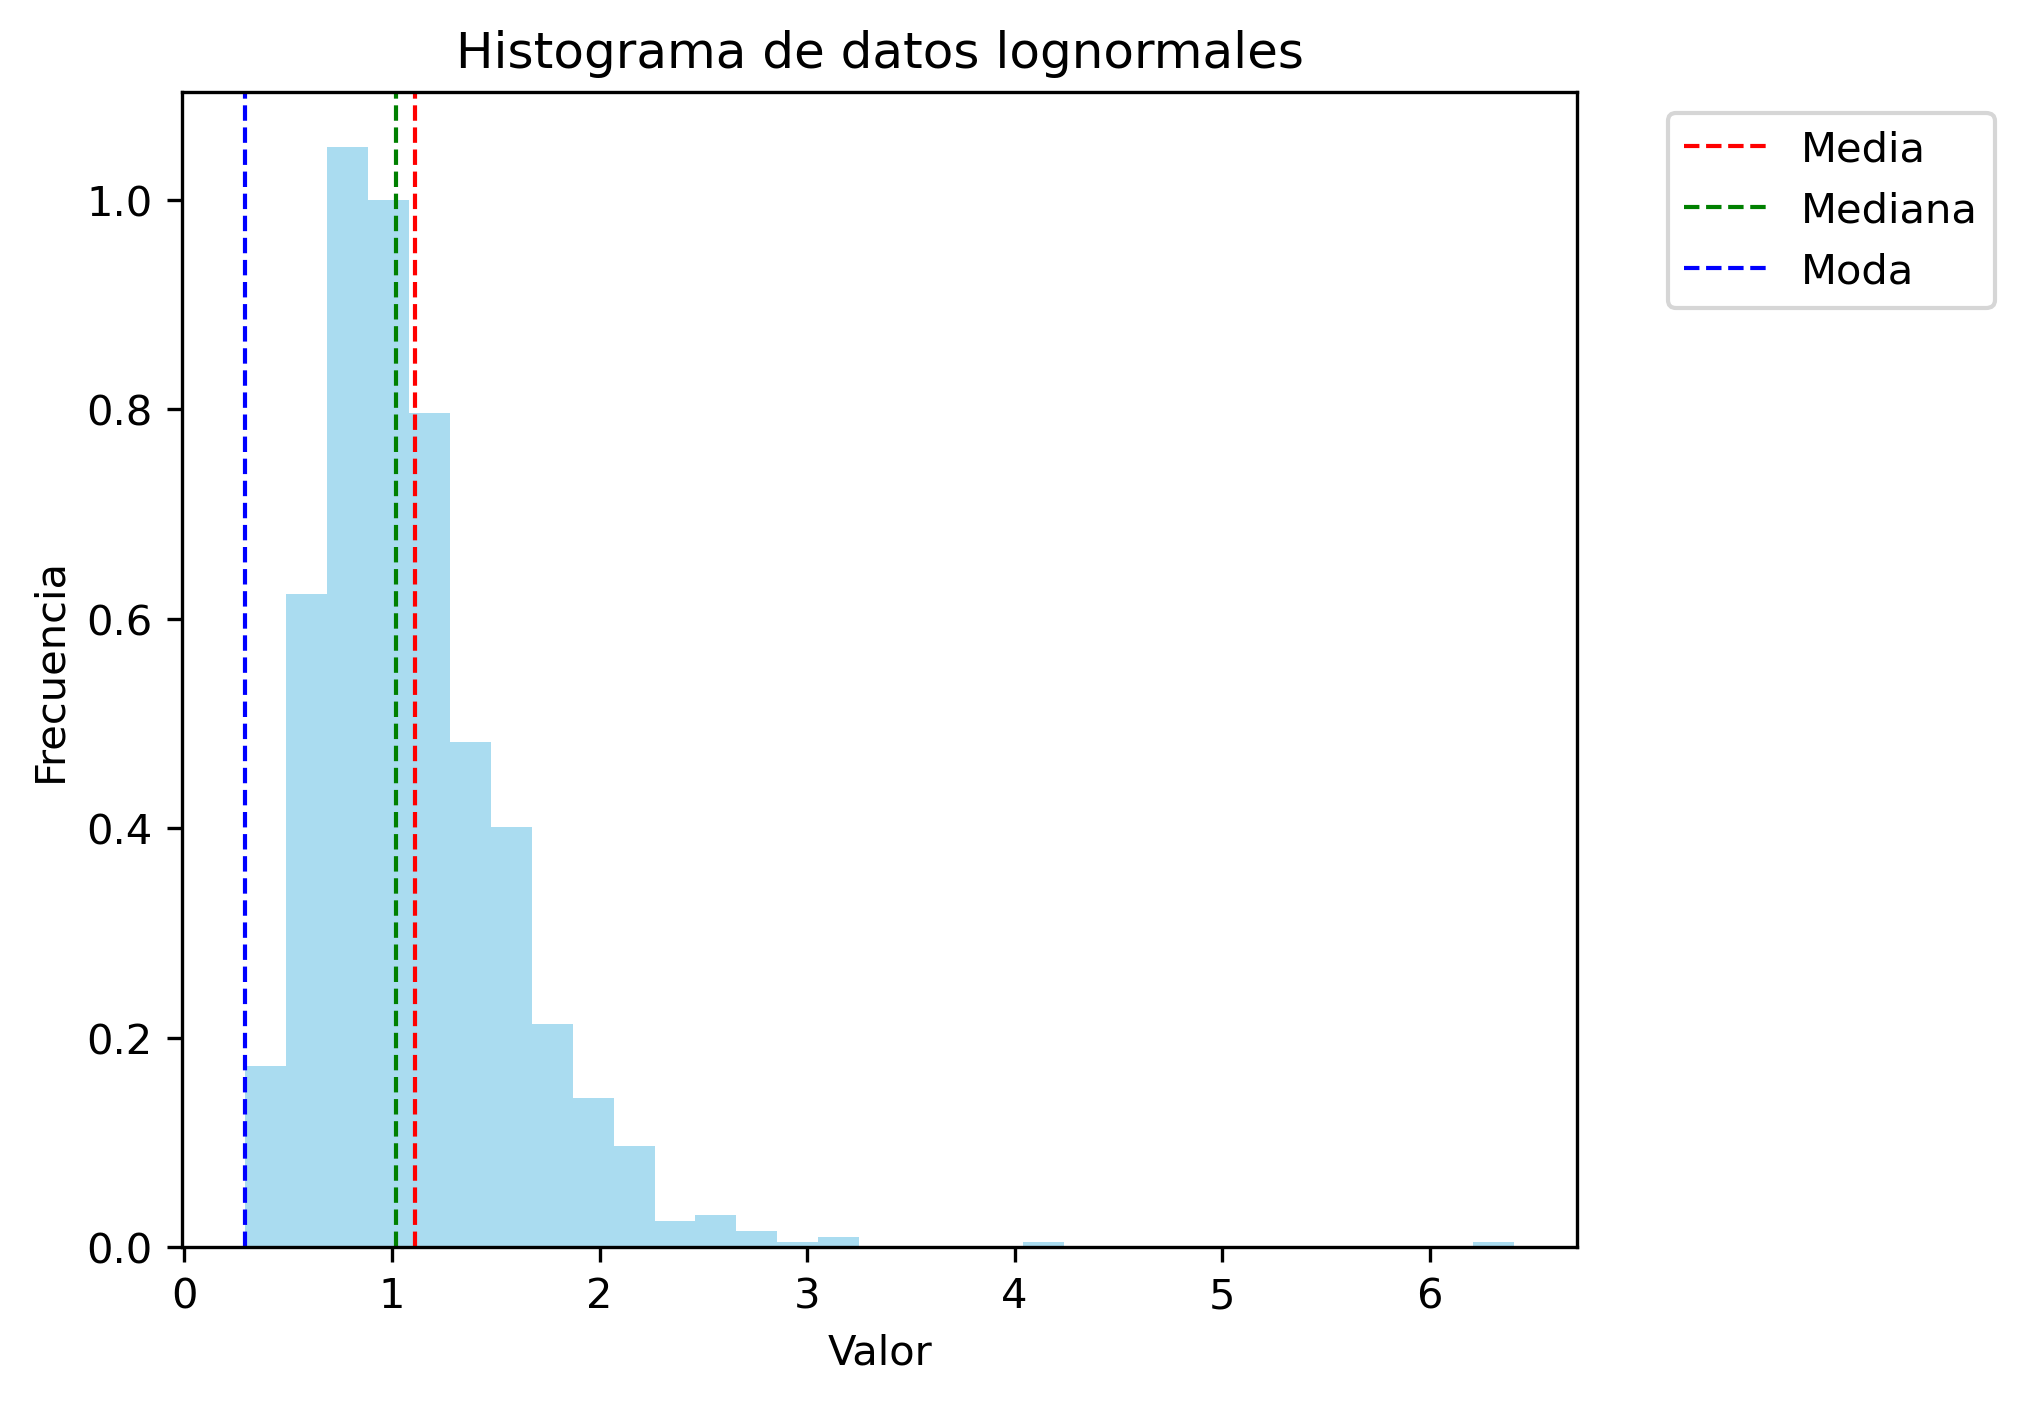

In [11]:
### histogram_described
histogram_described(data, mean = True, median = True, mode = True, ejex = 'Valor', ejey = 'Frecuencia', titulo = 'Histograma de datos normales')
histogram_described(data2, mean = True, median = True, mode = True, ejex = 'Valor', ejey = 'Frecuencia', titulo = 'Histograma de datos lognormales')
### OJO QUE EN DATOS CONTINUOS NO SE PUEDE CALCULAR LA MODA PORQUE NO HAY DOS VALORES IGUALES
### pero se puede calcular la moda de los datos discretos (por ejemplo, la moda de una distribucion binomial)

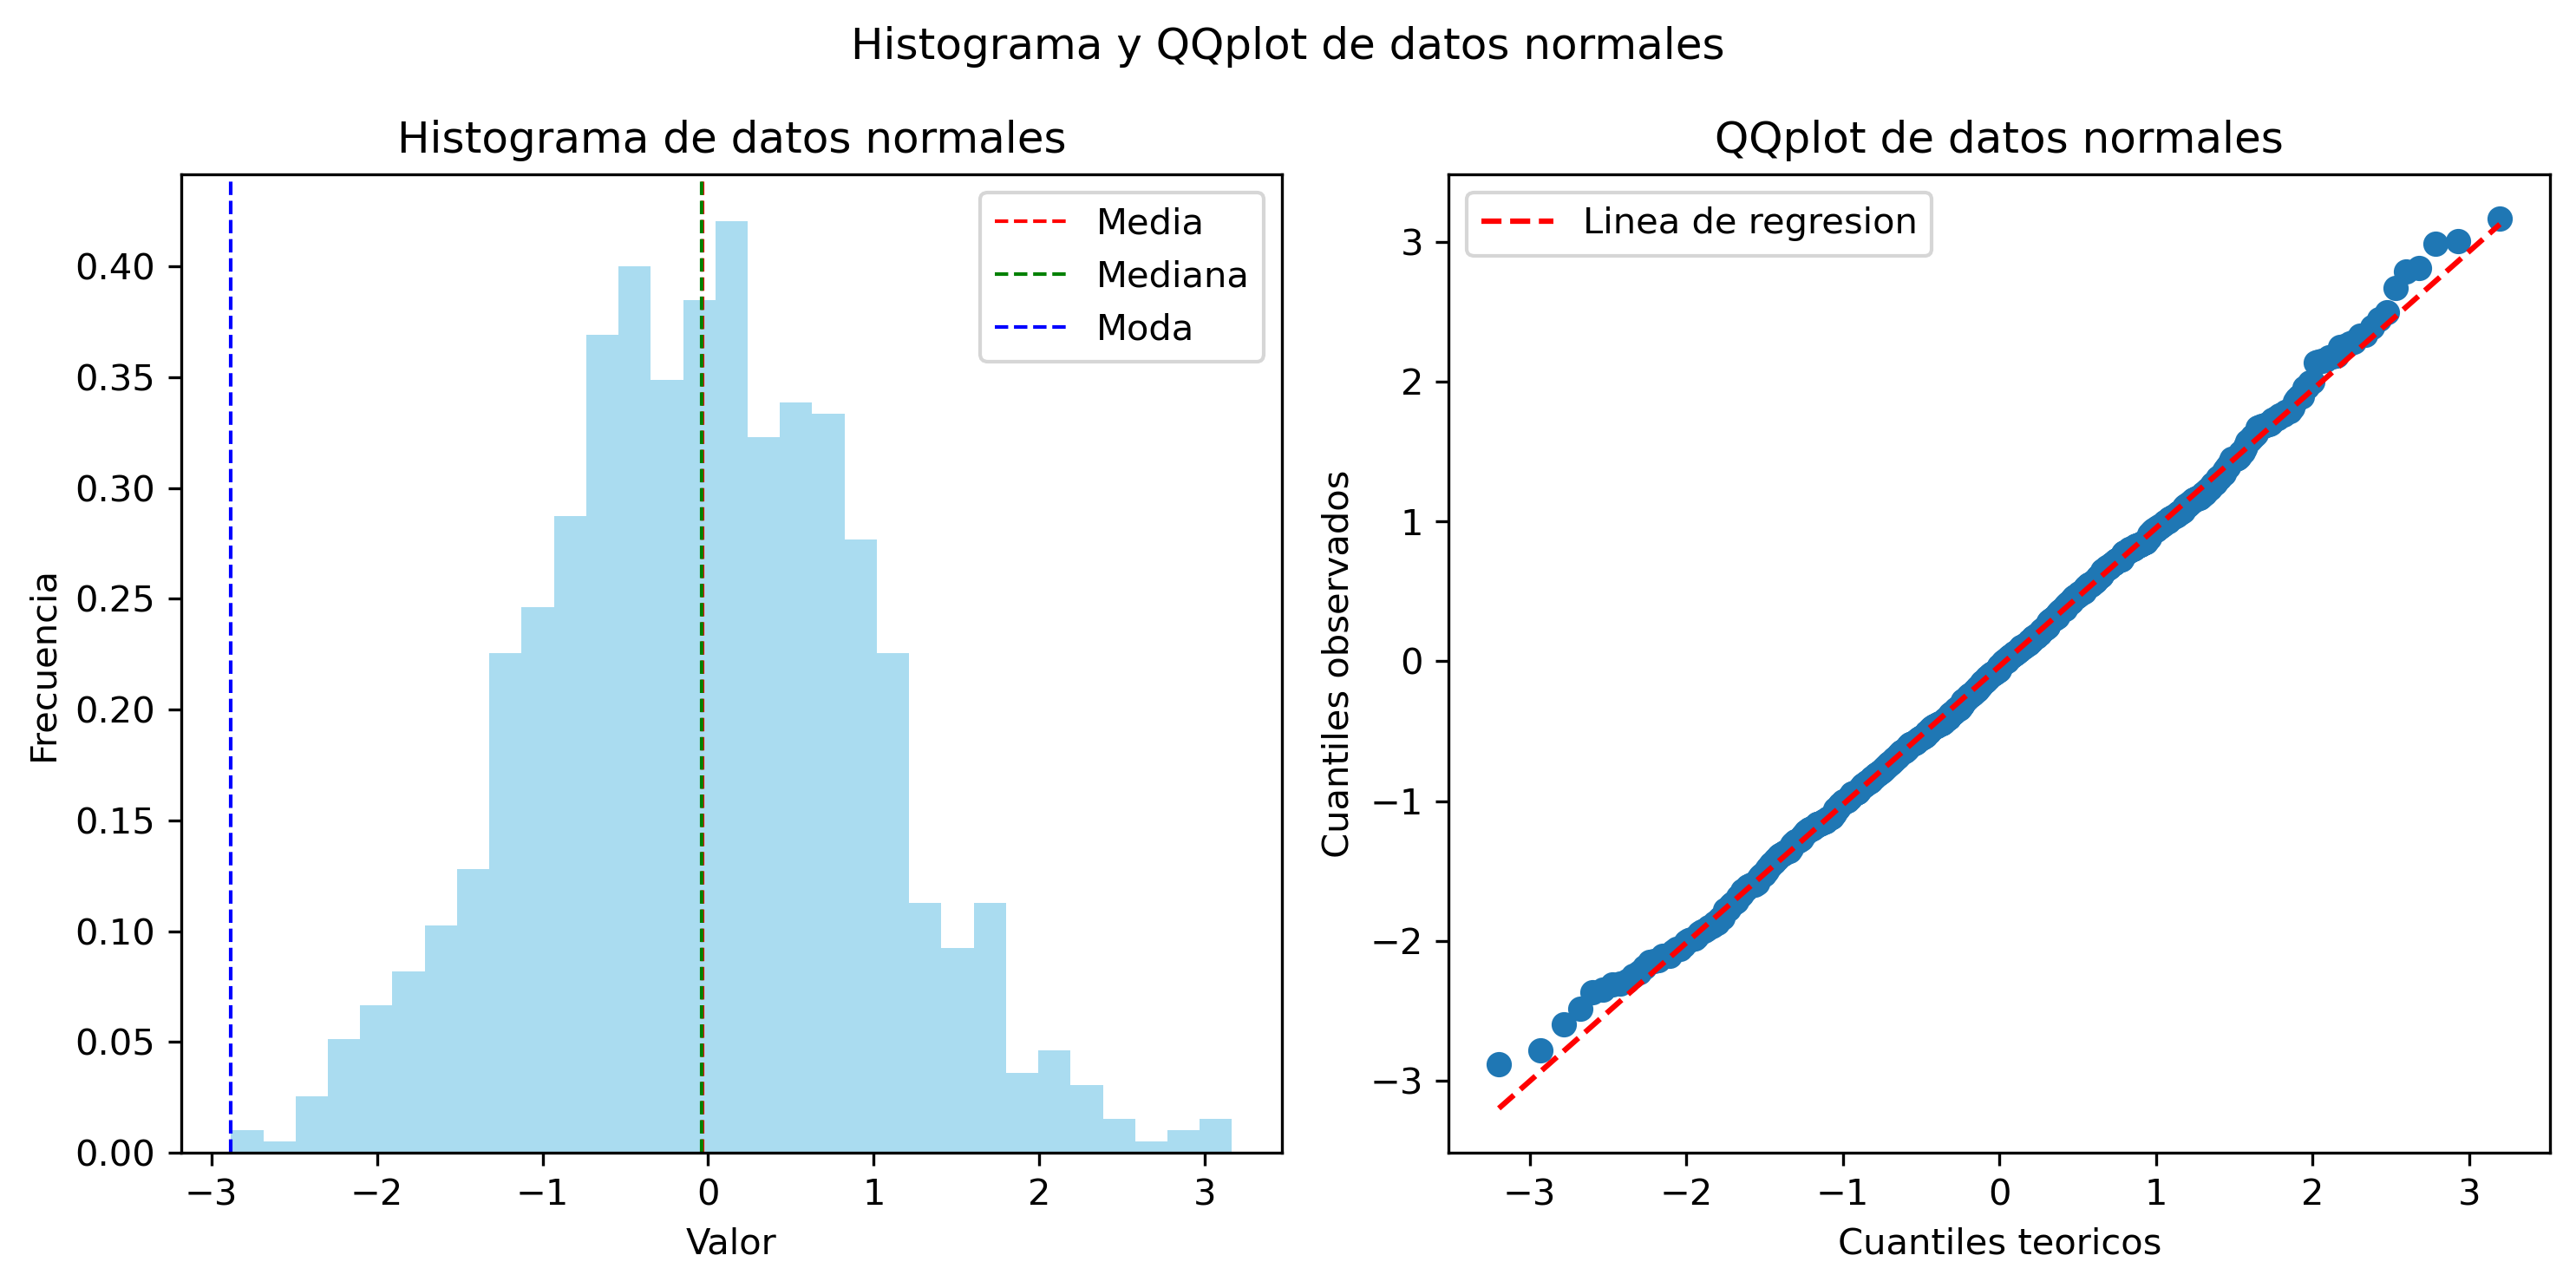

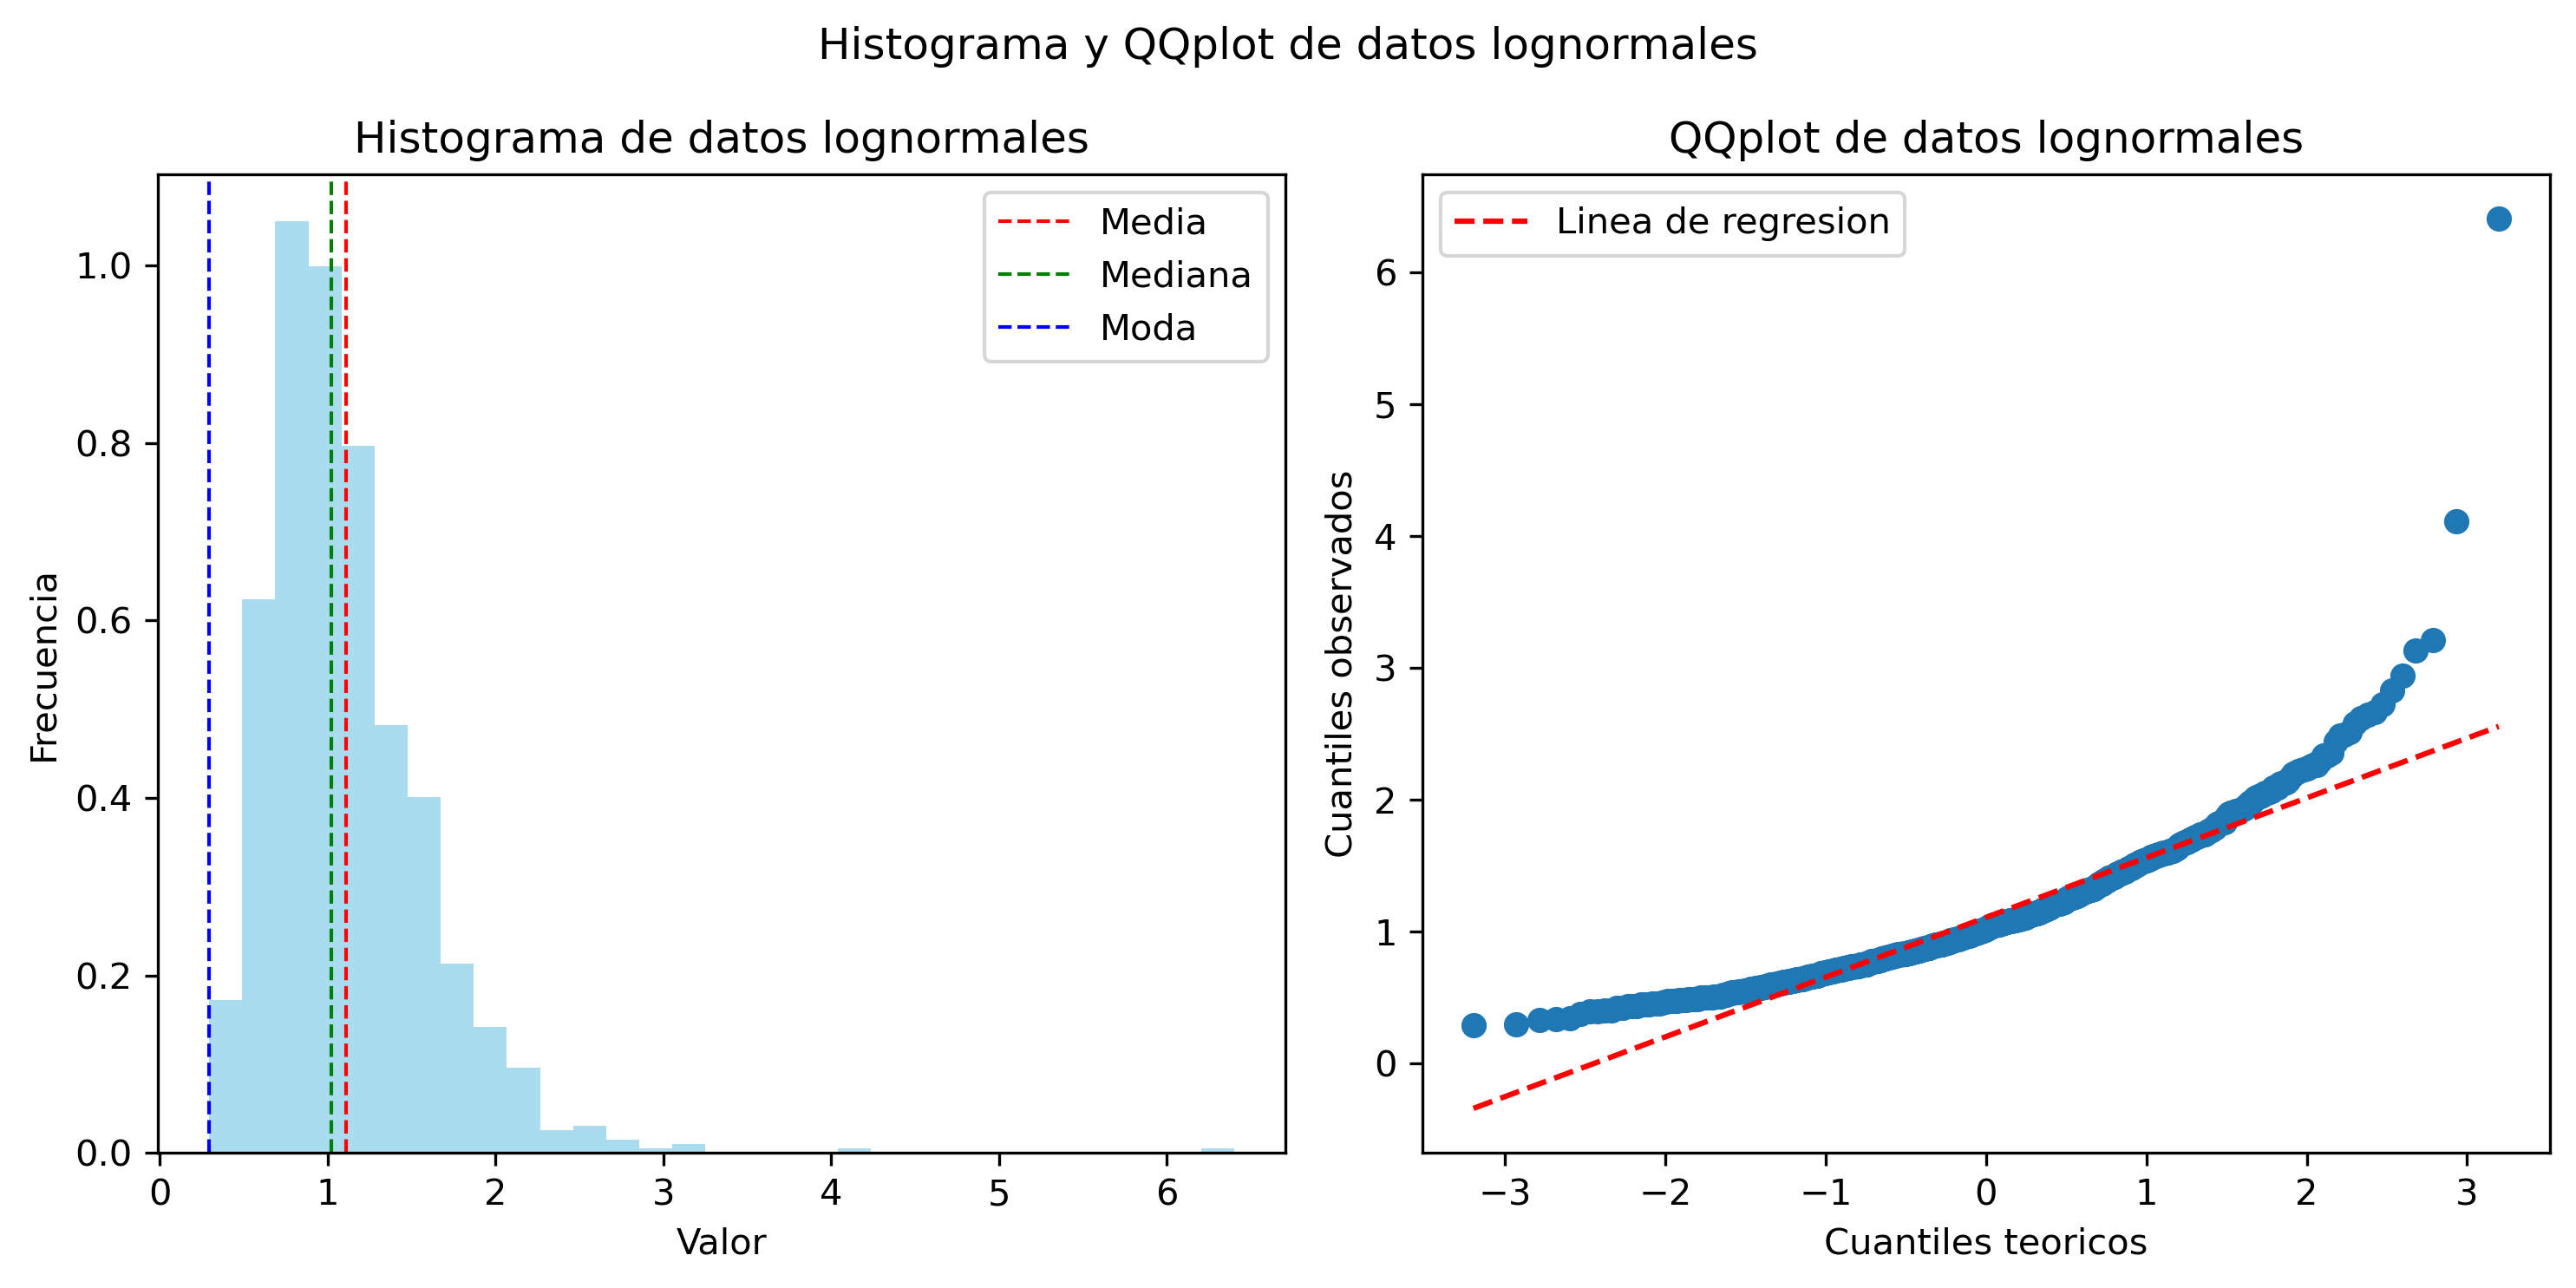

In [12]:
# histogram_qqplot
histogram_qqplot(data, mean = True, median = True, mode = True,
                    ejex_histogram = 'Valor', ejey_histogram = 'Frecuencia', titulo_histograma = 'Histograma de datos normales',
                    ejex_qqplot = 'Cuantiles teoricos', ejey_qqplot = 'Cuantiles observados', titulo_qqplot = 'QQplot de datos normales',
                    titulo_general = 'Histograma y QQplot de datos normales')
histogram_qqplot(data2, mean = True, median = True, mode = True,
                    ejex_histogram = 'Valor', ejey_histogram = 'Frecuencia', titulo_histograma = 'Histograma de datos lognormales',
                    ejex_qqplot = 'Cuantiles teoricos', ejey_qqplot = 'Cuantiles observados', titulo_qqplot = 'QQplot de datos lognormales',
                    titulo_general = 'Histograma y QQplot de datos lognormales')

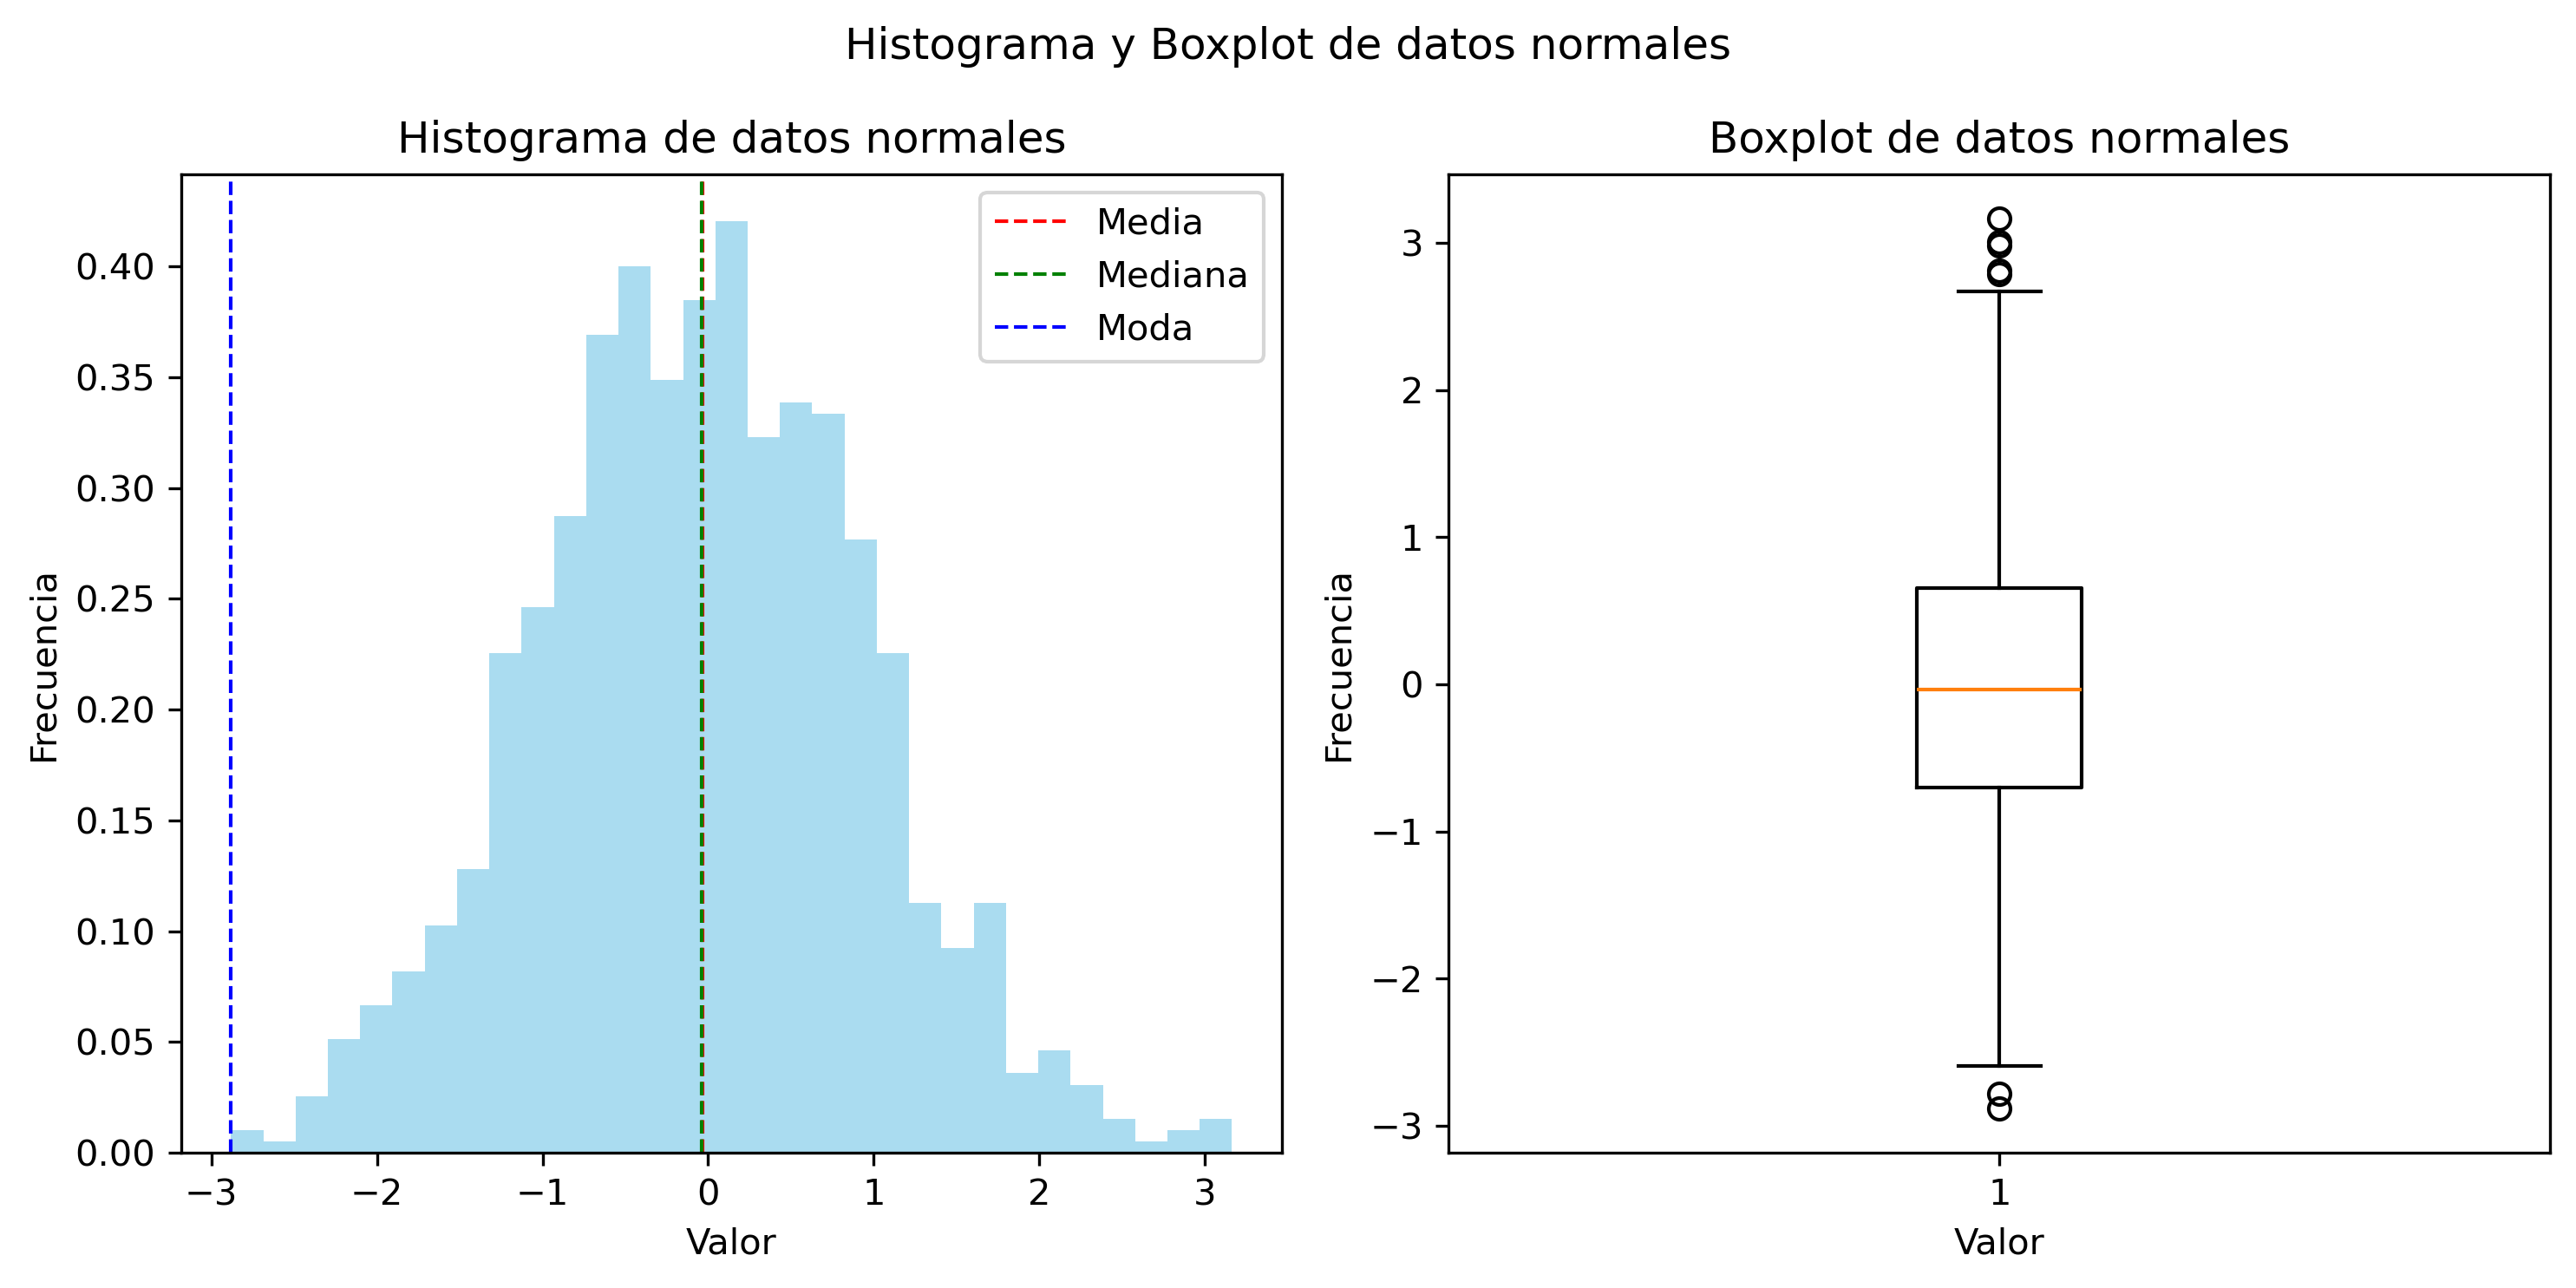

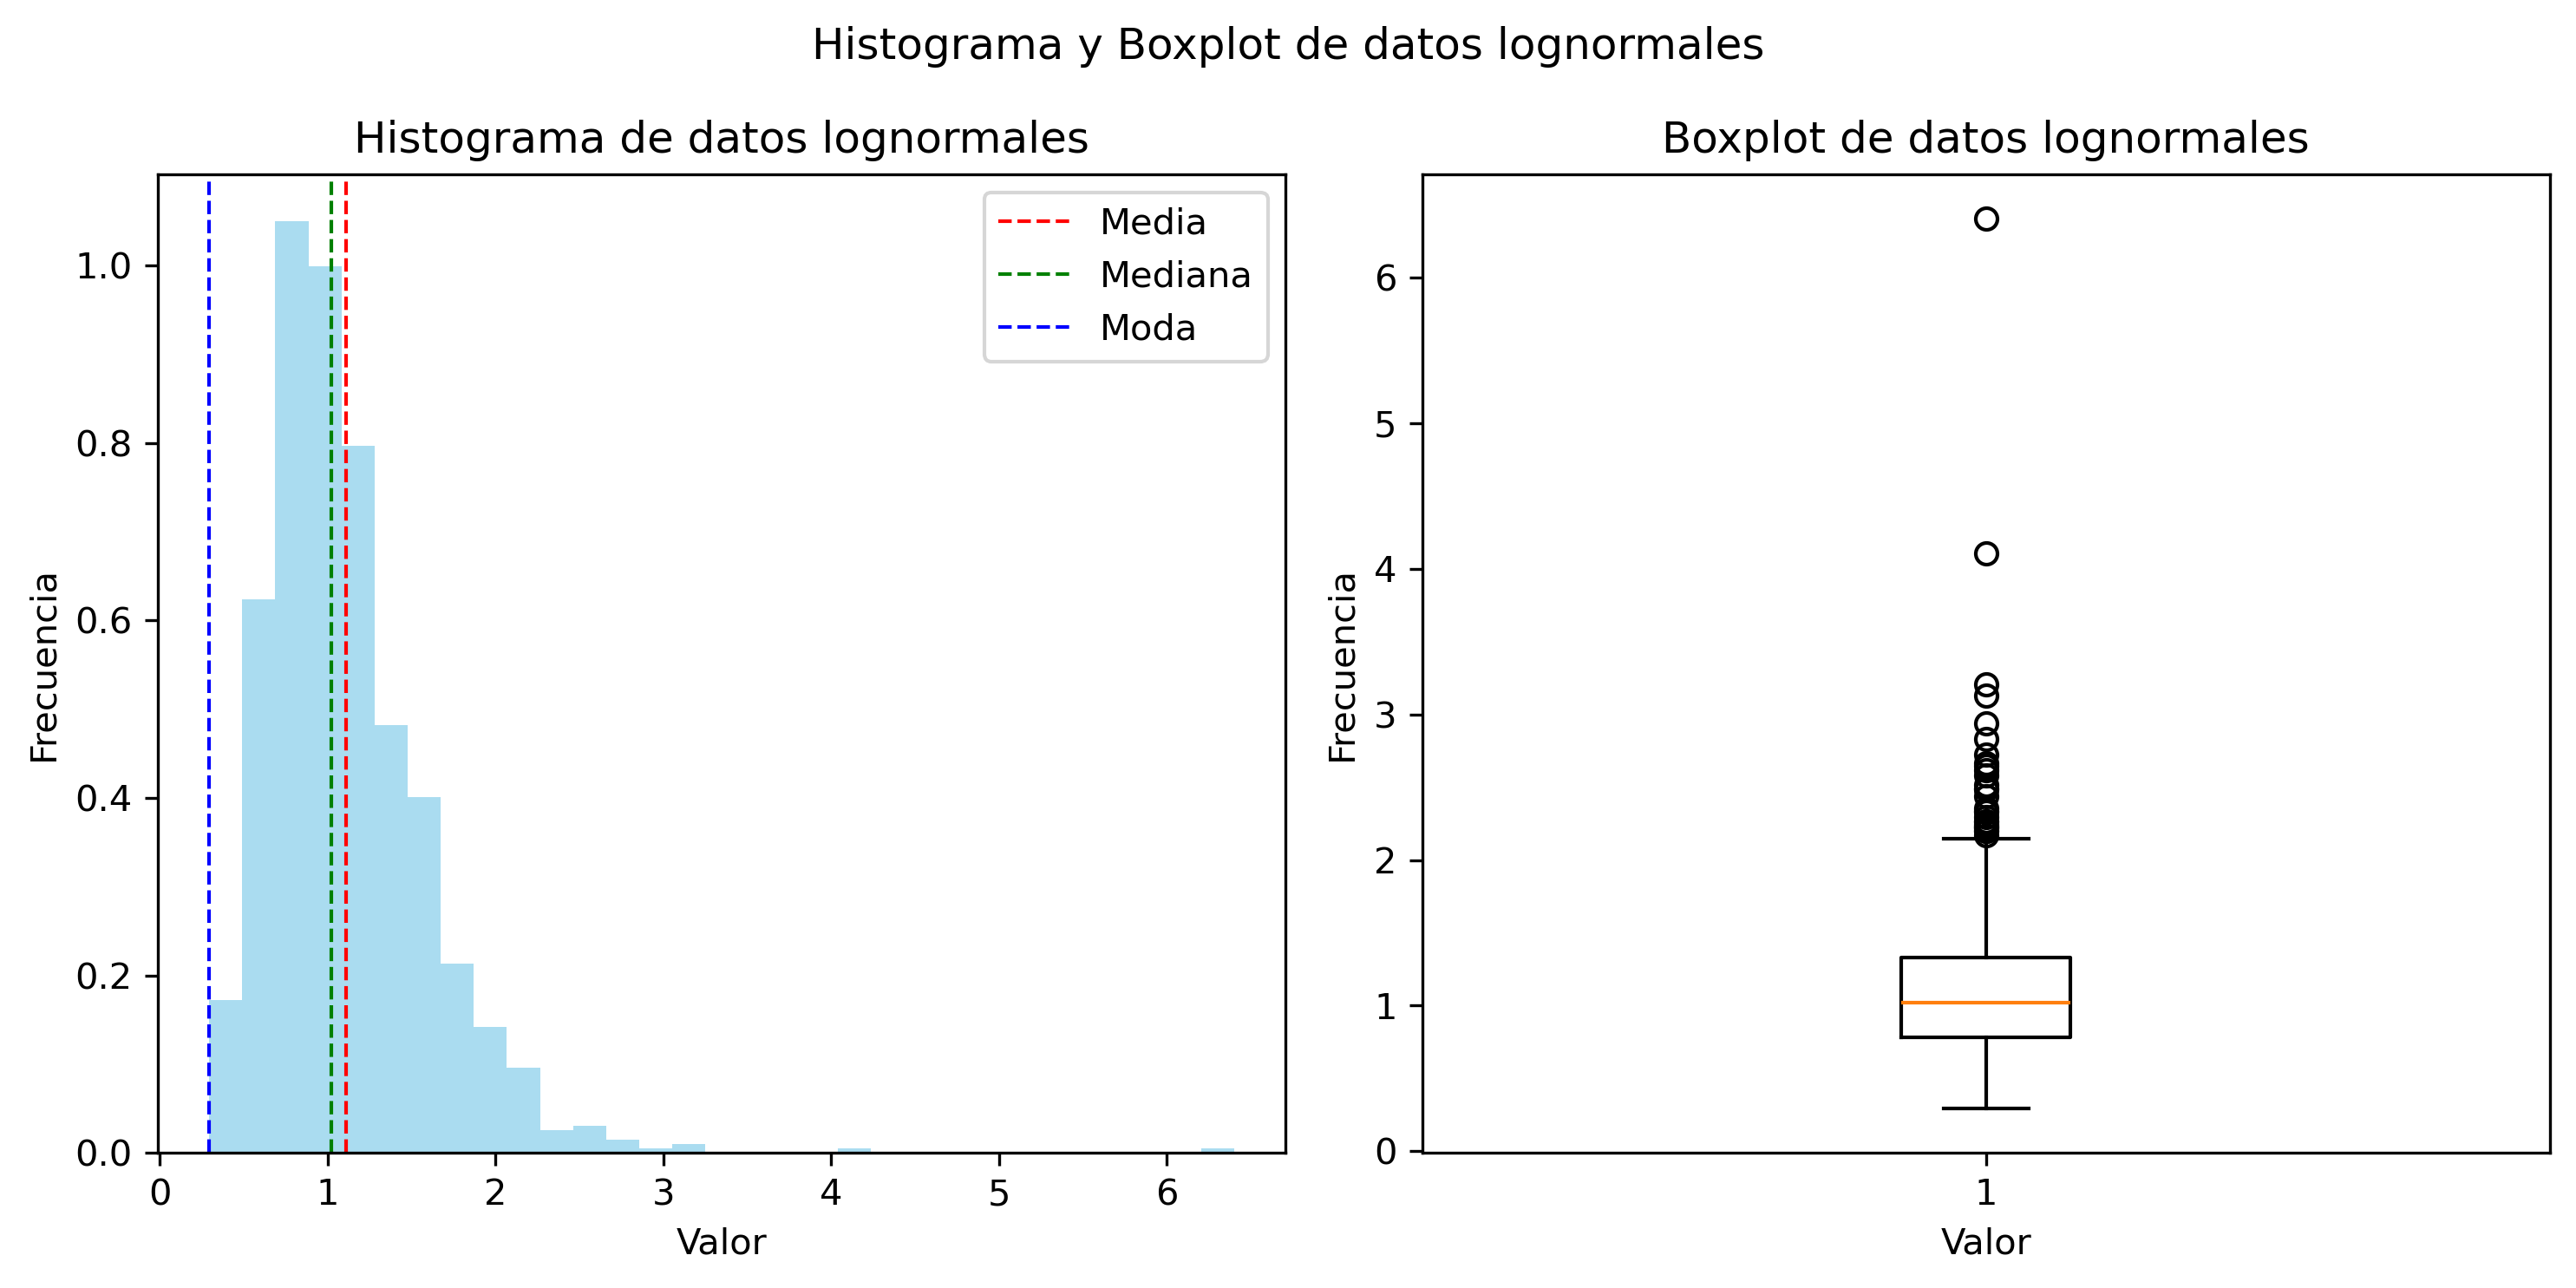

In [13]:
# histogram_boxplot
histogram_boxplot(data, mean = True, median = True, mode = True,
                    ejex_histogram = 'Valor', ejey_histogram = 'Frecuencia', titulo_histograma = 'Histograma de datos normales',
                    ejex_boxplot = 'Valor', ejey_boxplot = 'Frecuencia', titulo_boxplot = 'Boxplot de datos normales',
                    titulo_general = 'Histograma y Boxplot de datos normales')
histogram_boxplot(data2, mean = True, median = True, mode = True,
                    ejex_histogram = 'Valor', ejey_histogram = 'Frecuencia', titulo_histograma = 'Histograma de datos lognormales',
                    ejex_boxplot = 'Valor', ejey_boxplot = 'Frecuencia', titulo_boxplot = 'Boxplot de datos lognormales',
                    titulo_general = 'Histograma y Boxplot de datos lognormales')